## Smart Agent Recruitment Challenge

FinMan is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.


## Overview of FinMan On-boarding process
The Managers at FinMan are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to FinMan to become an agent. This date is known as application_receipt_date.

In the next 3 months, this potential agent has to undergo a 7 day training at the FinMan branch (about Sales processes and various products) and clear a subsequent examination in order to become a FinMan agent.


## The problem - Who are the best agents?
 As is obvious in the above process, there is a significant investment which FinMan makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business.

 Finman has approached you and asked you to to predict the target variable for each potential agent, which would help them identify the right agents to hire.

## Evaluation
Your model's performance would be evaluated based on roc_auc score.



## Public and Private Split
Test Data is further divided into Public and Private set.
Public leaderboard is based on First 2 months of the test dataset (02-Jul-2008 and 01-Sep-2008) and rest of test dataset is used for Private leaderboard.


Data Defination

    ID	-	Unique Application ID
    Office_PIN	-	PINCODE of Fintro's Offices
    Application_Receipt_Date	-	Date of Application
    Applicant_City_PIN	-	PINCODE of Applicant Address
    Applicant_Gender	-	Applicant's Gender
    Applicant_BirthDate	-	Applicant's Birthdate
    Applicant_Marital_Status	-	Applicant's Marital Status
    Applicant_Occupation	-	Applicant's Occupation
    Applicant_Qualification	-	Applicant's Educational Qualification
    Manager_DOJ	-	Manager's Date of Joining
    Manager_Joining_Designation	-	Manager's Joining Designation in Fintro
    Manager_Current_Designation	-	Manager's Designation at the time of application sourcing
    Manager_Grade	-	Manager's Grade in Fintro
    Manager_Status	-	Current Employment Status (Probation / Confirmation)
    Manager_Gender	-	Manager's Gender
    Manager_DoB	-	Manager's Birthdate
    Manager_Num_Application	-	No. of Applications sourced in last 3 months by the Manager
    Manager_Num_Coded	-	No. of agents recruited by the manager in last 3 months
    Manager_Business	-	Amount of business sourced by the manager in last 3 months
    Manager_Num_Products	-	Number of products sold by the manager in last 3 months
    Manager_Business2	-	Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor
    Manager_Num_Products2	-	Number of products sold by the manager in last 3 months excluding business from their Category A advisor
    Business_Sourced(Target)	-	Business sourced by applicant within 3 months [1/0] of recruitment


In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv("train_r7VTVyN_HtFA0Cn.csv")
data_test = pd.read_csv("test_ZkjAHF8_g6hTr3z.csv")

In [4]:
data_test.shape

(5045, 22)

In [9]:
pd.set_option("display.max_columns", 500)

In [10]:
data_test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [11]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [15]:
data.shape

(9527, 23)

In [17]:
data.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [18]:
data_test.shape

(5045, 22)

In [13]:
data_test.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [99]:
data.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [100]:
data.nunique()



ID                             9527
Office_PIN                       98
Application_Receipt_Date        357
Applicant_City_PIN             2979
Applicant_Gender                  2
Applicant_BirthDate            5836
Applicant_Marital_Status          4
Applicant_Occupation              5
Applicant_Qualification          11
Manager_DOJ                     646
Manager_Joining_Designation       8
Manager_Current_Designation       5
Manager_Grade                    10
Manager_Status                    2
Manager_Gender                    2
Manager_DoB                    1245
Manager_Num_Application          17
Manager_Num_Coded                10
Manager_Business               3747
Manager_Num_Products             57
Manager_Business2              3743
Manager_Num_Products2            57
Business_Sourced                  2
dtype: int64

array([[<AxesSubplot:title={'center':'Office_PIN'}>,
        <AxesSubplot:title={'center':'Applicant_City_PIN'}>,
        <AxesSubplot:title={'center':'Manager_Grade'}>],
       [<AxesSubplot:title={'center':'Manager_Num_Application'}>,
        <AxesSubplot:title={'center':'Manager_Num_Coded'}>,
        <AxesSubplot:title={'center':'Manager_Business'}>],
       [<AxesSubplot:title={'center':'Manager_Num_Products'}>,
        <AxesSubplot:title={'center':'Manager_Business2'}>,
        <AxesSubplot:title={'center':'Manager_Num_Products2'}>],
       [<AxesSubplot:title={'center':'Business_Sourced'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

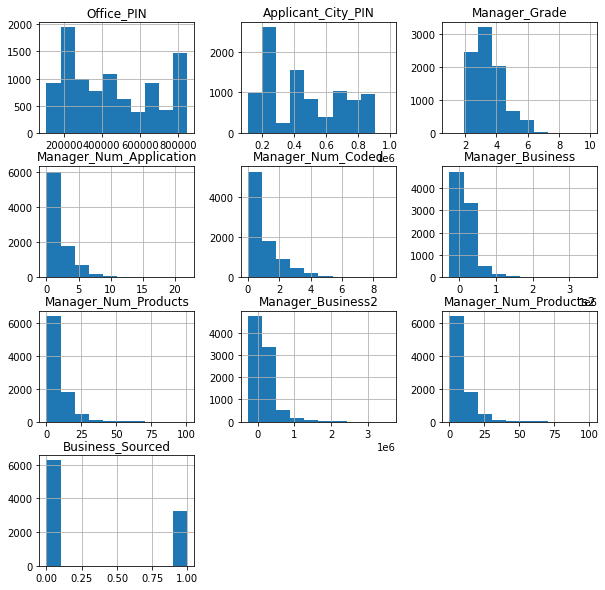

In [20]:
data.hist(figsize=(10,10))


In [22]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [30]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [29]:
data[data.Manager_DOJ.isna()].head(50)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
24,FIN1000025,209625,4/16/2007,205262.0,M,7/13/1982,S,Business,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
34,FIN1000035,851101,4/16/2007,851120.0,M,5/4/1970,M,Business,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
53,FIN1000054,803101,4/16/2007,803111.0,M,1/14/1988,S,Others,Class X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54,FIN1000055,803101,4/16/2007,803111.0,M,1/3/1978,S,Salaried,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83,FIN1000084,284001,4/17/2007,284403.0,M,9/6/1986,S,Others,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84,FIN1000085,851101,4/17/2007,851127.0,M,1/30/1985,S,Business,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,FIN1000087,209625,4/17/2007,205262.0,M,12/3/1981,S,Business,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
99,FIN1000100,851101,4/17/2007,851112.0,M,1/3/1958,M,Others,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
103,FIN1000104,271201,4/17/2007,271201.0,M,5/11/1964,M,Salaried,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
119,FIN1000120,230001,4/18/2007,230403.0,M,7/22/1981,S,Business,Class XII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [31]:
data.nunique()

ID                             9527
Office_PIN                       98
Application_Receipt_Date        357
Applicant_City_PIN             2979
Applicant_Gender                  2
Applicant_BirthDate            5836
Applicant_Marital_Status          4
Applicant_Occupation              5
Applicant_Qualification          11
Manager_DOJ                     646
Manager_Joining_Designation       8
Manager_Current_Designation       5
Manager_Grade                    10
Manager_Status                    2
Manager_Gender                    2
Manager_DoB                    1245
Manager_Num_Application          17
Manager_Num_Coded                10
Manager_Business               3747
Manager_Num_Products             57
Manager_Business2              3743
Manager_Num_Products2            57
Business_Sourced                  2
dtype: int64

In [34]:
test_test_test = data_test.head(10)

In [35]:
test_test_test

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
5,FIN1009533,533101,7/2/2008,533101.0,M,5/13/1983,S,NaN,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
6,FIN1009534,533101,7/2/2008,533261.0,M,1/27/1965,M,NaN,Graduate,10/13/2007,Level 2,Level 2,3.0,Confirmation,M,1/8/1978,6.0,0.0,80245.0,3.0,80245.0,3.0
7,FIN1009535,533101,7/2/2008,533101.0,M,3/15/1980,S,Salaried,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
8,FIN1009536,533101,7/2/2008,533288.0,M,6/26/1973,M,Others,Graduate,3/4/2008,Level 2,Level 2,3.0,Probation,M,9/6/1970,6.0,2.0,51988.0,2.0,51988.0,2.0
9,FIN1009537,281001,7/2/2008,281001.0,M,1/6/1984,S,NaN,Graduate,6/2/2008,Level 3,Level 3,4.0,Probation,M,6/20/1980,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_test_test_na = test_test_test[test_test_test.Manager_DoB.isna()]

In [41]:
test_test_test_na.index

Int64Index([2, 3], dtype='int64')

In [44]:
test_test_test_na

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
test_test_test.drop(test_test_test_na.index, inplace=True)

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
test_test_test

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
5,FIN1009533,533101,7/2/2008,533101.0,M,5/13/1983,S,NaN,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
6,FIN1009534,533101,7/2/2008,533261.0,M,1/27/1965,M,NaN,Graduate,10/13/2007,Level 2,Level 2,3.0,Confirmation,M,1/8/1978,6.0,0.0,80245.0,3.0,80245.0,3.0
7,FIN1009535,533101,7/2/2008,533101.0,M,3/15/1980,S,Salaried,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
8,FIN1009536,533101,7/2/2008,533288.0,M,6/26/1973,M,Others,Graduate,3/4/2008,Level 2,Level 2,3.0,Probation,M,9/6/1970,6.0,2.0,51988.0,2.0,51988.0,2.0
9,FIN1009537,281001,7/2/2008,281001.0,M,1/6/1984,S,NaN,Graduate,6/2/2008,Level 3,Level 3,4.0,Probation,M,6/20/1980,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
test_test_test.index.union(test_test_test_na.index)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [50]:
frame = [test_test_test, test_test_test_na]
test_test_test = pd.concat(frame)

In [52]:
test_test_test.sort_index()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
5,FIN1009533,533101,7/2/2008,533101.0,M,5/13/1983,S,NaN,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
6,FIN1009534,533101,7/2/2008,533261.0,M,1/27/1965,M,NaN,Graduate,10/13/2007,Level 2,Level 2,3.0,Confirmation,M,1/8/1978,6.0,0.0,80245.0,3.0,80245.0,3.0
7,FIN1009535,533101,7/2/2008,533101.0,M,3/15/1980,S,Salaried,Class XII,2/12/2008,Level 2,Level 2,3.0,Probation,M,1/8/1978,5.0,2.0,150721.0,4.0,150721.0,4.0
8,FIN1009536,533101,7/2/2008,533288.0,M,6/26/1973,M,Others,Graduate,3/4/2008,Level 2,Level 2,3.0,Probation,M,9/6/1970,6.0,2.0,51988.0,2.0,51988.0,2.0
9,FIN1009537,281001,7/2/2008,281001.0,M,1/6/1984,S,NaN,Graduate,6/2/2008,Level 3,Level 3,4.0,Probation,M,6/20/1980,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Convert columns to category columns

category_columns = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Business_Sourced']

# Convert columns to category columns

category_columns_test = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender']


In [102]:
for i in category_columns:
    data[i] = data[i].astype('category')

In [103]:
for i in category_columns_test:
    data_test[i] = data_test[i].astype('category')

In [104]:
test_view = pd.DataFrame({
    "Dtypes": data.dtypes,
    "Unique_Values": data.nunique()
})
test_view


,Dtypes,Unique_Values
ID,object,9527
Office_PIN,int64,98
Application_Receipt_Date,object,357
Applicant_City_PIN,float64,2979
Applicant_Gender,category,2
Applicant_BirthDate,object,5836
Applicant_Marital_Status,category,4
Applicant_Occupation,category,5
Applicant_Qualification,category,11
Manager_DOJ,object,646


In [105]:
datetime_fields = ['Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB']

In [106]:
def convert_to_datetime(df):
    for i in datetime_fields:
        df[i] = pd.to_datetime(df[i])

In [107]:
convert_to_datetime(data)
convert_to_datetime(data_test)

In [108]:
#from sklearn.cluster import KMeans

In [109]:
#kmeans = KMeans(n_clusters=2)

In [114]:
#X = data_test

In [116]:
#X = X.drop(category_columns_test, axis=1)

In [118]:
#X = X.drop('ID', axis=1)

In [119]:
#kmeans.fit(X)

TypeError: invalid type promotion